In [3]:
include("../src/function/original_delta_map.jl")
include("../src/function/r_estimate_original.jl")
include("../src/function/set_data_model.jl")
using PyCall
using PyPlot
# set parameters
freq_bands = [40, 60, 140]
freq_bands = [40, 60, 140, 235, 280, 337]
cmb_freq = 140
which_model = "d1 and s1"
r_input = 0.01
seed = 2
nside = 4
num_I = 2  
cov_mat_scal = npzread("../covariance_matrix/smoothing_cov_mat_scal.npy")
cov_mat_tens = npzread("../covariance_matrix/smoothing_cov_mat_tens.npy")
mask_path = "../mask_p06_Nside4.v2.fits"
mask = hp.read_map(mask_path);
N⁻¹_set = Matrix{Float64}[]  
Q_map = Vector{Vector{Float64}}()  
U_map = Vector{Vector{Float64}}()  
r_est = 0.

# definite SetParams and FitParams struct
set_params = SetParams(freq_bands, which_model, r_input, cmb_freq, seed, nside, cov_mat_scal, cov_mat_tens, mask, Q_map, U_map, N⁻¹_set)
fit_params = FitParams(-3, 1.5, 20.1, r_est);

In [4]:
make_input_map!(set_params);

In [16]:
@time iterative_minimization(set_params, fit_params)

Iteration 1: r = 0.008954316407291107, Likelihood = -2214.37670993033
delta_like = 1.0000002214376709e10
delta_r = 0.0
Iteration 2: r = 0.008954316407291107, Likelihood = -2214.3767099557376
delta_like = 2.5407643988728523e-8
delta_r = 0.0
  1.094273 seconds (46.12 k allocations: 935.978 MiB, 9.72% gc time)


In [9]:
num_seeds = 10
@time r_dis, beta_s_dis, beta_d_dis, T_d_dis = estimate_r_distribution(set_params, fit_params, num_seeds);

Iteration 1: r = 0.008148251271287876, Likelihood = -2240.0691488354023
delta_like = 1.0000002240069149e10
delta_r = 0.0008060651360032312
Iteration 2: r = 0.008146212319102786, Likelihood = -2240.0697558112674
delta_like = 0.0006069758651392476
delta_r = 2.0389521850905368e-6
Iteration 1: r = 0.008954316407291107, Likelihood = -2214.37670993033
delta_like = 1.0000002214376709e10
delta_r = 0.0
Iteration 2: r = 0.008954316407291107, Likelihood = -2214.3767099557376
delta_like = 2.5407643988728523e-8
delta_r = 0.0
Iteration 1: r = 0.0072723813928587955, Likelihood = -2236.981247465563
delta_like = 1.0000002236981247e10
delta_r = 0.001681935014432312
Iteration 2: r = 0.007233332755598398, Likelihood = -2237.002378076131
delta_like = 0.02113061056843435
delta_r = 3.904863726039709e-5
Iteration 3: r = 0.007233050703108035, Likelihood = -2237.002386552478
delta_like = 8.476346920360811e-6
delta_r = 2.8205249036350466e-7
Iteration 1: r = 0.009889707226840627, Likelihood = -2218.764009264893
d

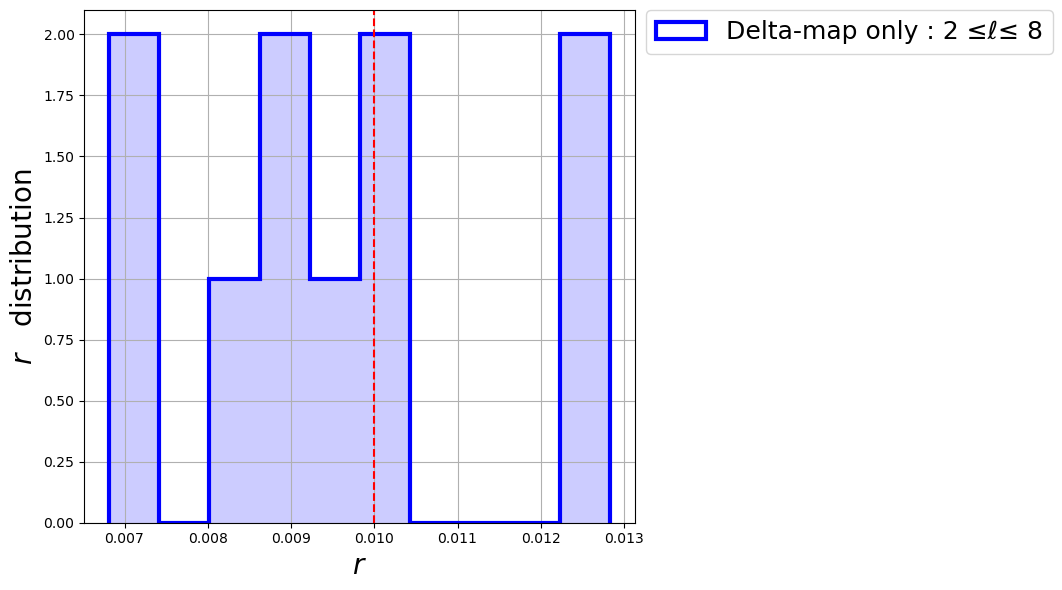

In [13]:
figure(figsize=(8, 6))
hist(r_dis, bins=10, alpha=0.2, color="blue", histtype="stepfilled")
hist(r_dis, bins = 10, alpha = 1., edgecolor = "blue", label = "Delta-map only : 2 ≤ℓ≤ 8", histtype = "step", linewidth = 3)
axvline(x = r_input, color = "red", linestyle = "--")
xlabel(L"$r$", fontsize=20)
ylabel(L"$r\quad$distribution", fontsize=20)  # ここを修正しました
plt.grid(true)
legend(loc="upper left", bbox_to_anchor=(1.02, 1), borderaxespad=0., fontsize="18")
tight_layout()
subplots_adjust(right=0.8)
show()

In [14]:
mean(r_dis)

0.009461430834764311

In [15]:
mean(beta_s_dis)

-2.9761862334831073